For 2 points:
Bias: 0.249912
Variance: 0.000000

For 20 points:
Bias: 0.025163
Variance: 0.000000


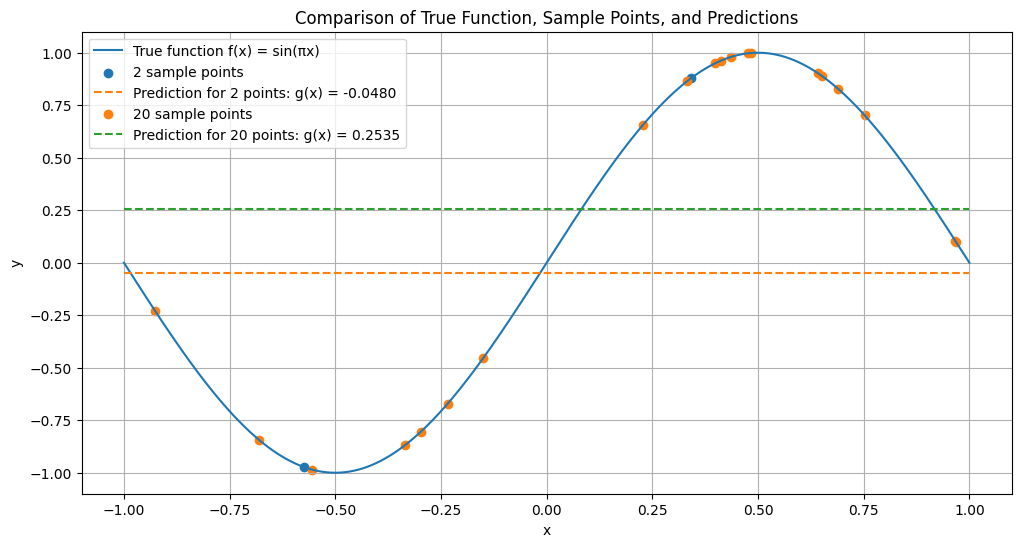

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
def generate_data(n):
    x = np.random.uniform(-1, 1, n)
    y = np.sin(np.pi * x)
    return x, y

# Calculate b (prediction)
def calculate_b(x, y):
    return np.mean(y)


# Calculate bias and variance (for both 2 and 20 points)
def calculate_bias_variance(n_points, n_simulations=10000):
    bias_sum = 0
    variance_sum = 0
    
    for _ in range(n_simulations):
        x, y = generate_data(n_points)
        b = calculate_b(x, y)
        
        # Calculate bias
        x_test = np.linspace(-1, 1, 1000)
        y_true = np.sin(np.pi * x_test)
        y_pred = np.full_like(x_test, b)
        bias = np.mean(y_pred - y_true)
        bias_sum += bias**2
        
        # Calculate variance
        variance = np.mean((y_pred - b)**2)
        variance_sum += variance
    
    return bias_sum / n_simulations, variance_sum / n_simulations

# Calculate for 2 points
bias_2, variance_2 = calculate_bias_variance(2)
print(f"For 2 points:")
print(f"Bias: {bias_2:.6f}")
print(f"Variance: {variance_2:.6f}")

# Calculate for 20 points
bias_20, variance_20 = calculate_bias_variance(20)
print(f"\nFor 20 points:")
print(f"Bias: {bias_20:.6f}")
print(f"Variance: {variance_20:.6f}")

# # Calculate expected out-of-sample error
# out_of_sample_error_2 = bias_2 + variance_2
# out_of_sample_error_20 = bias_20 + variance_20

# print(f"\nExpected out-of-sample error (2 points): {out_of_sample_error_2:.6f}")
# print(f"Expected out-of-sample error (20 points): {out_of_sample_error_20:.6f}")

# Visualize results
def plot_results():
    x = np.linspace(-1, 1, 1000)
    y_true = np.sin(np.pi * x)
    
    plt.figure(figsize=(12, 6))
    plt.plot(x, y_true, label='True function f(x) = sin(πx)')
    
    for n_points in [2, 20]:
        x_sample, y_sample = generate_data(n_points)
        b = calculate_b(x_sample, y_sample)
        y_pred = np.full_like(x, b)
        
        plt.scatter(x_sample, y_sample, label=f'{n_points} sample points')
        plt.plot(x, y_pred, '--', label=f'Prediction for {n_points} points: g(x) = {b:.4f}')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Comparison of True Function, Sample Points, and Predictions')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_results()

Part (a) - Bias: 0.868, Variance: 0.000
Part (b) - Bias: 0.516, Variance: 0.000


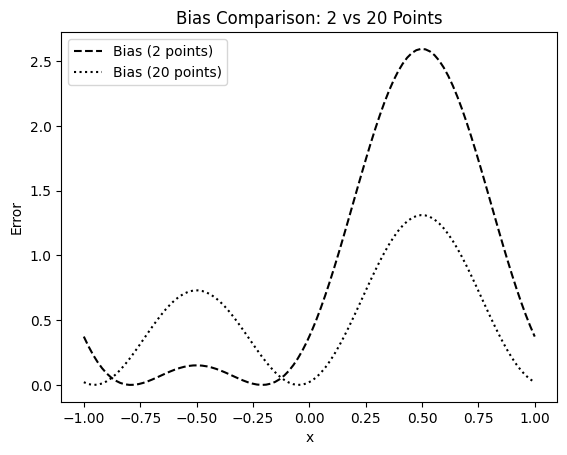

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target function f(x) = sin(πx)
def target_function(x):
    return np.sin(np.pi * x)

# Part (a): Train on two data points
# Set two random points x1, x2 uniformly distributed in [-1, 1]
x1, x2 = np.random.uniform(-1, 1, 2)

# Calculate the average hypothesis (g(D)) as the midpoint
g_D = (target_function(x1) + target_function(x2)) / 2

# Part (a): Bias and Variance for two points
# For the hypothesis h(x) = b, where b = g(D)
def bias_variance_for_two_points(x_points):
    bias = 0
    variance = 0
    for x in x_points:
        # Bias: (g(D) - f(x))^2
        bias += (g_D - target_function(x)) ** 2
        # Variance: As we only use a horizontal line hypothesis, variance is zero
    bias /= len(x_points)
    variance = 0
    return bias, variance

# Generate test points to compute bias and variance over [-1, 1]
test_points = np.linspace(-1, 1, 100)
bias_a, var_a = bias_variance_for_two_points(test_points)

# Part (b): Train on 20 data points
# Generate 20 random points uniformly distributed in [-1, 1]
x_train_20 = np.random.uniform(-1, 1, 20)

# Calculate g(D) for the 20 points as the average of f(x) over those points
g_D_20 = np.mean(target_function(x_train_20))

# Part (b): Bias and Variance for 20 points
def bias_variance_for_20_points(x_points):
    bias = 0
    variance = 0
    for x in x_points:
        # Bias: (g(D) - f(x))^2
        bias += (g_D_20 - target_function(x)) ** 2
        # Variance remains zero as hypothesis is a constant line
    bias /= len(x_points)
    variance = 0
    return bias, variance

# Compute bias and variance for the 20-point training set
bias_b, var_b = bias_variance_for_20_points(test_points)

# Display results
print(f"Part (a) - Bias: {bias_a:.3f}, Variance: {var_a:.3f}")
print(f"Part (b) - Bias: {bias_b:.3f}, Variance: {var_b:.3f}")

# Plot results for visualization
xi = np.linspace(-1, 1, 100)
yi = target_function(xi)

plt.plot(xi, (g_D - yi)**2, '--k', label='Bias (2 points)')
plt.plot(xi, (g_D_20 - yi)**2, ':k', label='Bias (20 points)')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Bias Comparison: 2 vs 20 Points')
plt.show()
